<center><h1 style="color:orange;">Customer Satisfaction Prediction</h3><h2 style="background-color:green;"></h2>

## About Dataset
The Customer Support Ticket Dataset is a dataset that includes customer support
tickets for various tech products. It consists of customer inquiries related to hardware
issues, software bugs, network problems, account access, data loss, and other support
topics. The dataset provides information about the customer, the product purchased,
the ticket type, the ticket channel, the ticket status, and other relevant details.
The dataset can be used for various analysis and modelling tasks in the customer
service domain

## 🧩 Problem Statement:
The goal of this project is to predict customer satisfaction ratings based on historical customer support ticket data. The dataset contains information such as customer demographics, the type and channel of support ticket, response times, and resolution details. By analyzing these features, we aim to build a machine learning model that can accurately forecast the customer satisfaction score (on a scale of 1 to 5), helping businesses identify factors that influence customer experience and improve their service quality.

## Features Description:
- **Ticket ID:** A unique identifier for each ticket.
- **Customer Name:** The name of the customer who raised the ticket.
- **Customer Email:** The email address of the customer (Domain name -
@example.com is intentional for user data privacy concern).
- **Customer Age:** The age of the customer.
- **Customer Gender:** The gender of the customer.
- **Product Purchased:** The tech product purchased by the customer.
- **Date of Purchase:** The date when the product was purchased.
- **Ticket Type:** The type of ticket (e.g., technical issue, billing inquiry, product
inquiry).
- **Ticket Subject:** The subject/topic of the ticket.
- **Ticket Description:** The description of the customer's issue or inquiry.
- **Ticket Status:** The status of the ticket (e.g., open, closed, pending customer
response).
- **Resolution:** The resolution or solution provided for closed tickets.
- **Ticket Priority:** The priority level assigned to the ticket (e.g., low, medium, high,
critical).
- **Ticket Channel:** The channel through which the ticket was raised (e.g., email,
phone, chat, social media).
- **First Response Time:** The time taken to provide the first response to the
customer.
- **Time to Resolution:** The time taken to resolve the ticket.
- **Customer Satisfaction Rating:** The customer's satisfaction rating for closed
tickets (on a scale of 1 to 5)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine,text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier

<center><h1 style="color:orange;">Data Extraction</h1>

In [6]:
df=pd.read_csv(r"D:\OneDrive\Venkat.My_projects\datassetss\customer_support_tickets.csv")

In [7]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [9]:
df.shape

(8469, 17)

In [10]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

<center><h1 style="color:orange;">Data Preprocessing</h1>

In [11]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [12]:
data=df.dropna()

In [13]:
data.isnull().sum()

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [14]:
data.shape

(2769, 17)

In [15]:
label_encoder={}
for column in data.select_dtypes(include=["object"]).columns:
    label_encoder[column]=LabelEncoder()
    data[column]=label_encoder[column].fit_transform(data[column])

C:\Users\Admin\AppData\Local\Temp\ipykernel_6520\3841641371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column]=label_encoder[column].fit_transform(data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6520\3841641371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column]=label_encoder[column].fit_transform(data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_6520\3841641371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [16]:
data

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,519,844,48,2,10,191,4,8,53,0,343,2,3,1347,2153,3.0
3,4,475,252,27,0,25,310,0,0,627,0,2549,2,3,946,293,3.0
4,5,34,251,67,0,5,34,0,3,188,0,2657,2,1,96,2356,1.0
10,11,1297,1619,48,1,30,376,1,3,1323,0,1368,1,2,2079,85,1.0
11,12,290,580,51,1,27,650,2,15,360,0,1366,1,0,1452,1168,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,8453,563,1154,62,0,24,87,3,5,261,0,1143,0,2,1688,708,3.0
8453,8454,2030,2561,61,2,41,167,0,10,2529,0,2157,1,0,1553,610,5.0
8455,8456,215,2400,54,2,11,390,0,14,2387,0,2020,1,1,1694,866,1.0
8466,8467,1876,166,57,0,15,583,4,0,1924,0,666,1,3,1175,580,3.0


<center><h1 style="color:orange;">EDA(Exploratory Data Analysis)</h1>

In [22]:
age=df['Customer_Age'].value_counts()
# age

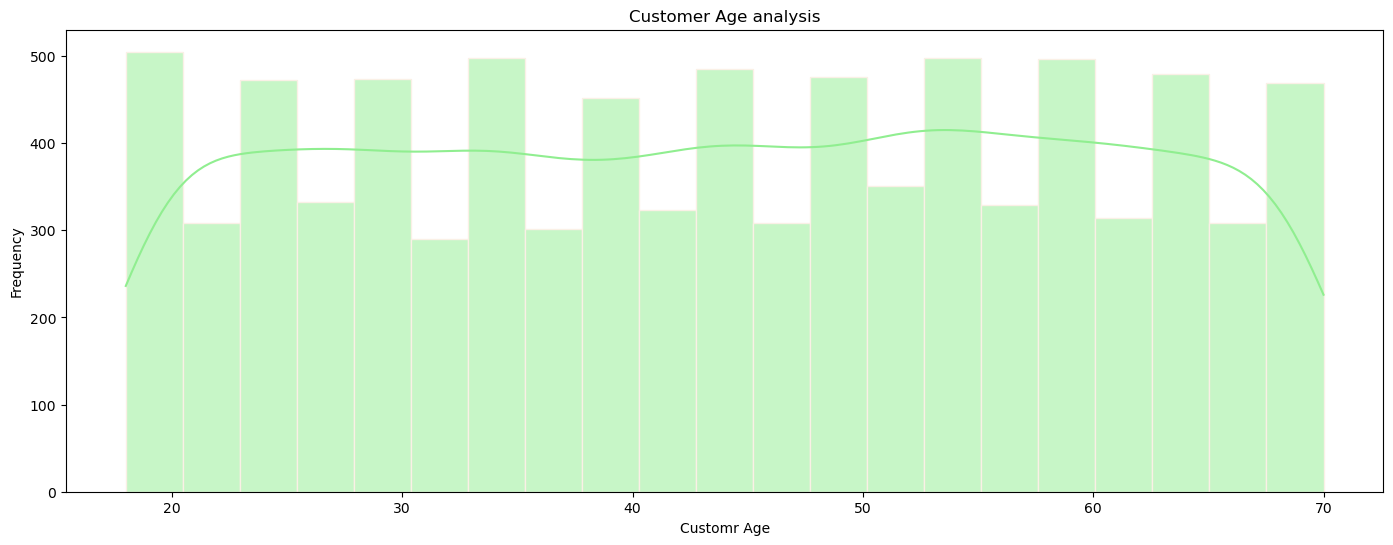

In [23]:
plt.figure(figsize=(17,6))


sns.histplot(df['Customer_Age'],color='lightgreen',kde=True,edgecolor="linen")
plt.title("Customer Age analysis")
plt.xlabel("Customr Age")
plt.ylabel("Frequency")
plt.show()

In [24]:
common_issues=df['Ticket_Subject'].value_counts()
common_issues

Ticket_Subject
Refund request              576
Software bug                574
Product compatibility       567
Delivery problem            561
Hardware issue              547
Battery life                542
Network problem             539
Installation support        530
Product setup               529
Payment issue               526
Product recommendation      517
Account access              509
Peripheral compatibility    496
Data loss                   491
Cancellation request        487
Display issue               478
Name: count, dtype: int64

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

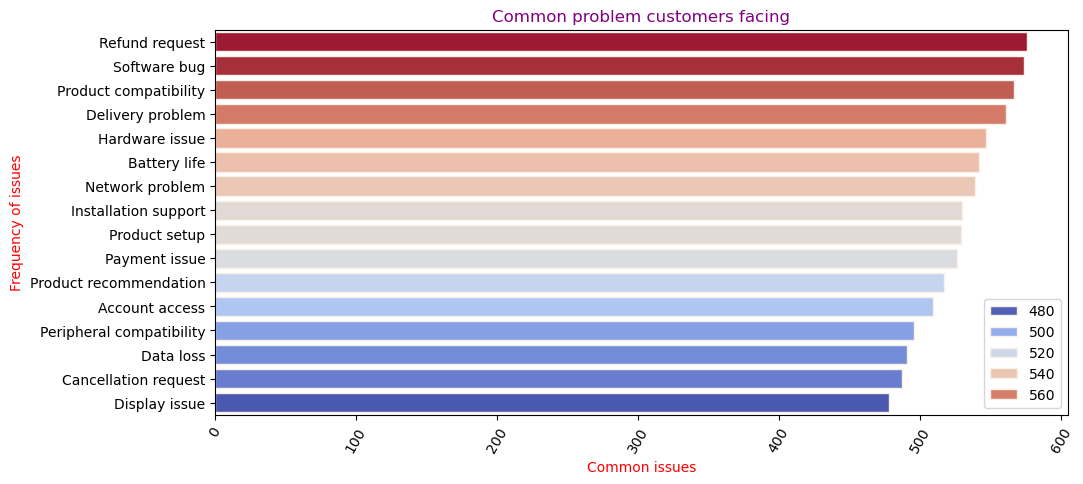

In [25]:
plt.figure(figsize=(11,5))

sns.barplot(x=common_issues.values,y=common_issues.index,hue=common_issues.values,palette='coolwarm',edgecolor="linen")
plt.title("Common problem customers facing",color="purple")
plt.xlabel("Common issues",color="red")
plt.ylabel("Frequency of issues",color="red")
plt.xticks(rotation=60)

In [26]:
df["Date_of_Purchase"]=pd.to_datetime(df["Date_of_Purchase"])
Year_month=df['Date_of_Purchase'].dt.to_period('M')
ticket_trends=data.groupby(Year_month).size()

In [27]:
ticket_trends

Date_of_Purchase
2020-01    127
2020-02    123
2020-03    105
2020-04    123
2020-05     96
2020-06    124
2020-07    119
2020-08     96
2020-09    139
2020-10    120
2020-11     97
2020-12    134
2021-01    122
2021-02    107
2021-03    106
2021-04    114
2021-05    115
2021-06    107
2021-07    126
2021-08    114
2021-09    104
2021-10    115
2021-11    121
2021-12    115
Freq: M, dtype: int64

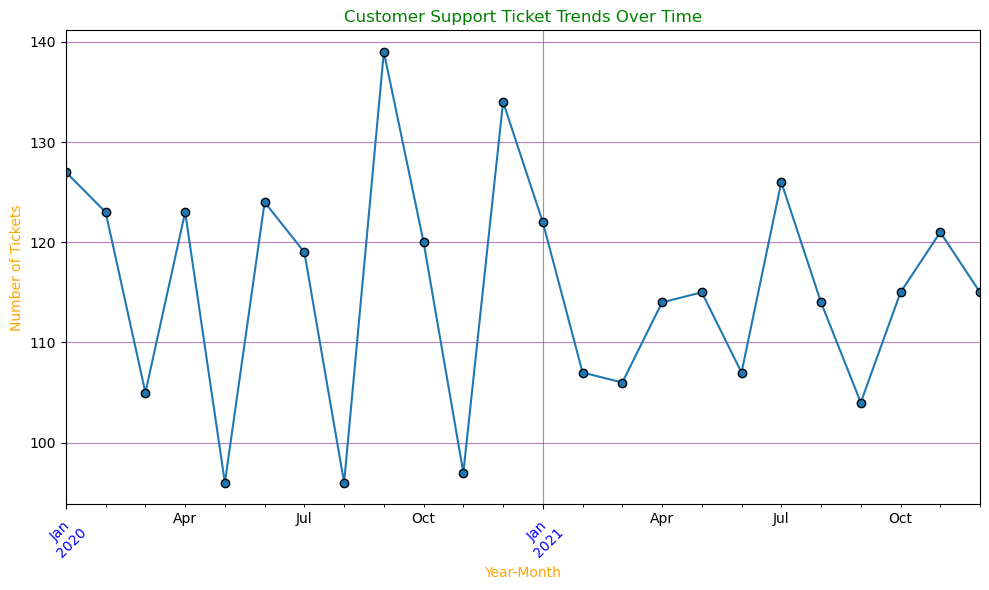

In [28]:
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o',mec='black')
plt.title('Customer Support Ticket Trends Over Time',color="green")
plt.xlabel('Year-Month',color='orange')
plt.ylabel('Number of Tickets',color='orange')
plt.grid(True,color='purple',alpha=.5)
plt.xticks(rotation=45,color='blue')
plt.tight_layout()
plt.show()


In [29]:
ticket_seg=df['Ticket_Type'].value_counts()
print("Ticket segmentation")
ticket_seg

Ticket segmentation


Ticket_Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

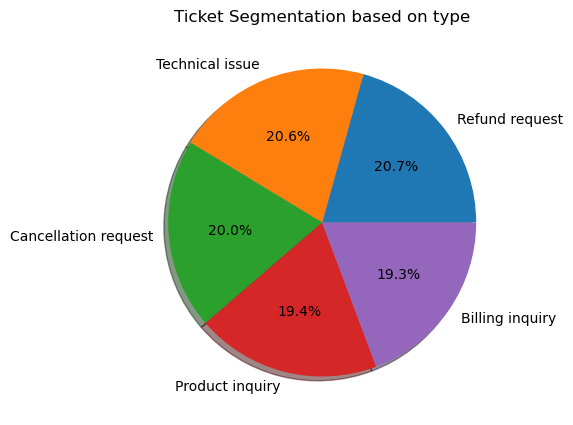

In [30]:
plt.figure(figsize=(11,5))

plt.pie(ticket_seg.values,labels=ticket_seg.index,shadow=True,autopct='%1.1f%%')
plt.title("Ticket Segmentation based on type")
plt.show()

In [31]:
df.groupby('Customer_Gender').size()

Customer_Gender
Female    2887
Male      2896
Other     2686
dtype: int64

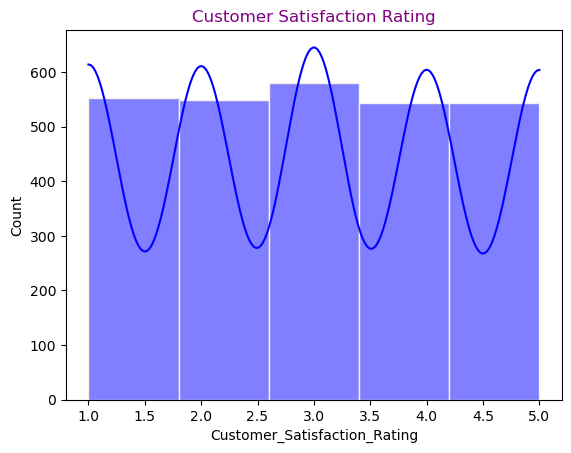

In [32]:
sns.histplot(df['Customer_Satisfaction_Rating'],bins=5,kde=True,color='blue',edgecolor="linen")
plt.title("Customer Satisfaction Rating",color='purple')
plt.show()

In [33]:
status=df['Ticket_Status'].value_counts()

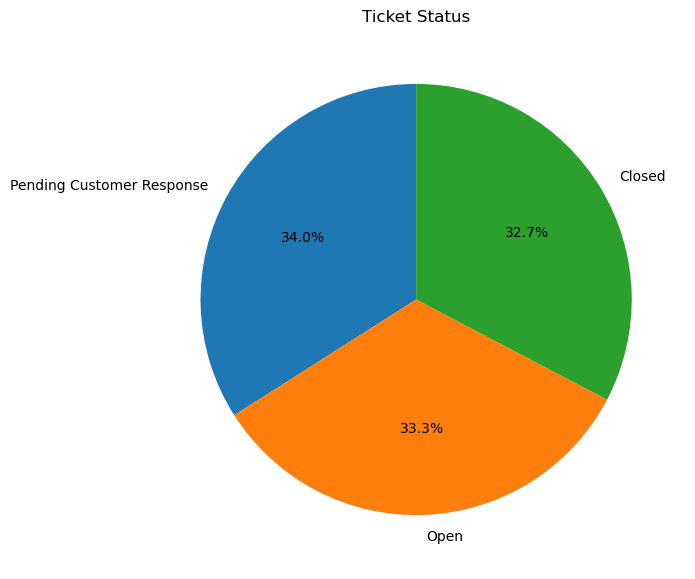

In [34]:
plt.figure(figsize=(11,7))

plt.pie(status,labels=status.index,autopct='%1.1f%%',startangle=90)
plt.title("Ticket Status")
plt.show()

In [35]:
ticket_priority=df.groupby('Ticket_Priority').size()
ticket_priority

Ticket_Priority
Critical    2129
High        2085
Low         2063
Medium      2192
dtype: int64

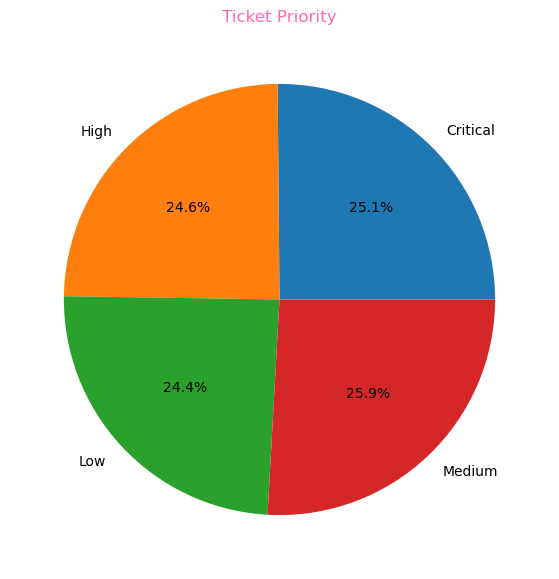

In [36]:
plt.figure(figsize=(11,7))

plt.pie(ticket_priority,labels=ticket_priority.index,autopct='%1.1f%%')
plt.title("Ticket Priority",color='hotpink')
plt.show()

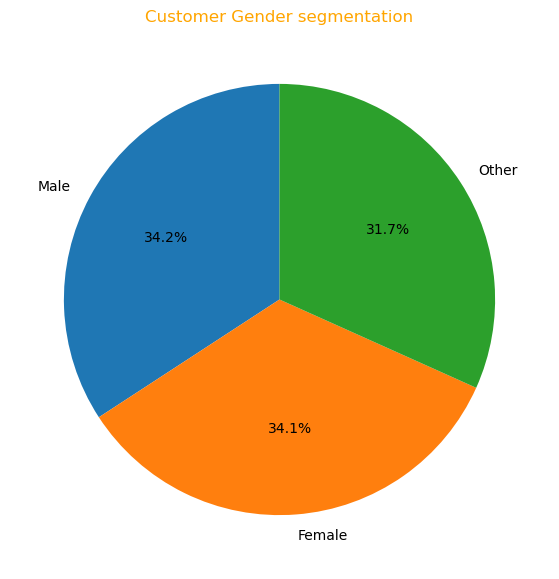

In [37]:
gender=df['Customer_Gender'].value_counts()

plt.figure(figsize=(11,7))
plt.pie(gender.values,labels=gender.index,autopct='%1.1f%%',startangle=90)
plt.title("Customer Gender segmentation",color='orange')
plt.show()

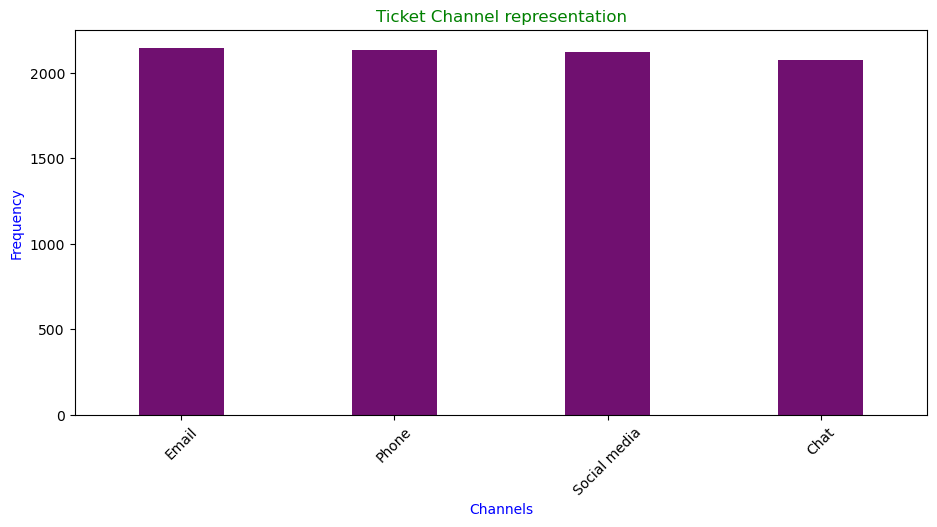

In [38]:
channel=df['Ticket_Channel'].value_counts()
plt.figure(figsize=(11,5))

sns.barplot(x=channel.index,y=channel.values,width=0.4,color='purple')
plt.title('Ticket Channel representation',color='green')
plt.xlabel('Channels',color='blue')
plt.ylabel('Frequency',color='blue')
plt.xticks(rotation=45)
plt.show()

In [39]:
gender_rating=df.groupby('Customer_Gender')['Customer_Satisfaction_Rating'].mean().reset_index()
order_gender_rating=gender_rating.sort_values(by='Customer_Satisfaction_Rating',ascending=False)
order_gender_rating

,Customer_Gender,Customer_Satisfaction_Rating
1,Male,3.028384
2,Other,2.974684
0,Female,2.971545


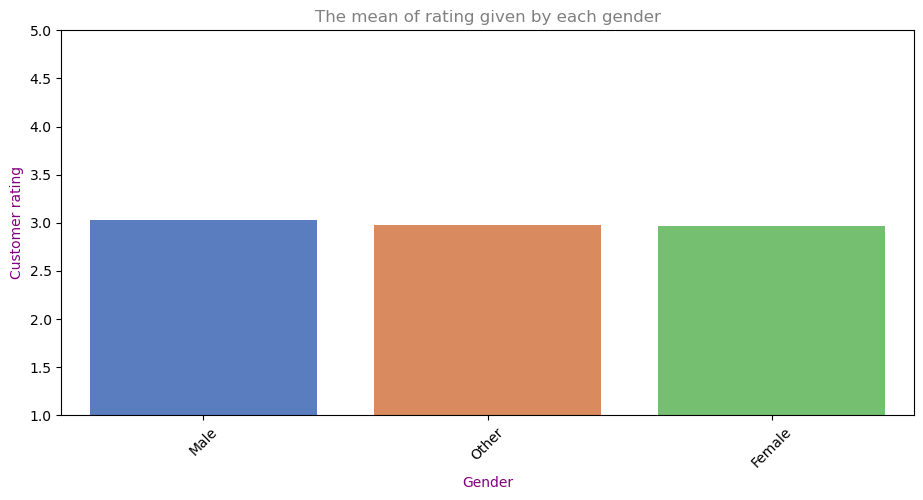

In [40]:
plt.figure(figsize=(11,5))

sns.barplot(x='Customer_Gender',y='Customer_Satisfaction_Rating',data=order_gender_rating,hue='Customer_Gender',palette='muted')
plt.title('The mean of rating given by each gender',color='gray')
plt.xlabel('Gender',color='purple')
plt.ylabel('Customer rating',color='purple')
plt.ylim(1,5)
plt.xticks(rotation=45)
plt.show()

In [41]:
product_purchased=df['Product_Purchased'].value_counts()
sort_product_purchased=product_purchased.sort_values(ascending=False)
print('Top 10 product purchased by customers')
products=sort_product_purchased.head(10)
products

Top 10 product purchased by customers


Product_Purchased
Canon EOS              240
GoPro Hero             228
Nest Thermostat        225
Philips Hue Lights     221
Amazon Echo            221
LG Smart TV            219
Sony Xperia            217
Roomba Robot Vacuum    216
Apple AirPods          213
LG OLED                213
Name: count, dtype: int64

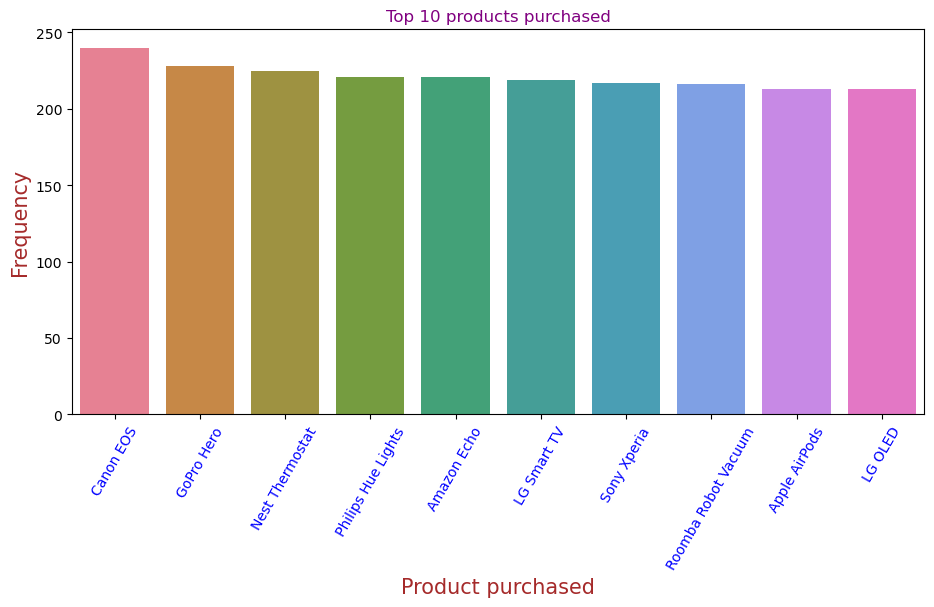

In [42]:
plt.figure(figsize=(11,5))

sns.set_palette('RdBu')
sns.barplot(x=products.index,y=products.values,hue=products.index)
plt.title('Top 10 products purchased',color='purple')
plt.xlabel('Product purchased',color='brown',size=15)
plt.ylabel('Frequency',color='brown',size=15)
plt.xticks(rotation=60,color='blue')
plt.show()

In [43]:
products_male=df[df['Customer_Gender']=='Male']['Product_Purchased'].value_counts().head(5)

products_female=df[df['Customer_Gender']=='Female']['Product_Purchased'].value_counts().head(5)
products_others=df[df['Customer_Gender']=='Other']['Product_Purchased'].value_counts().head(5)


In [44]:
products_male

Product_Purchased
GoPro Hero            82
Google Nest           82
Google Pixel          81
Sony Xperia           80
Philips Hue Lights    78
Name: count, dtype: int64

In [45]:
products_female

Product_Purchased
Dyson Vacuum Cleaner    80
Canon EOS               79
Amazon Echo             79
GoPro Hero              79
Canon DSLR Camera       78
Name: count, dtype: int64

In [46]:
products_others

Product_Purchased
Canon EOS              86
Roomba Robot Vacuum    80
LG Smart TV            76
Nest Thermostat        75
Philips Hue Lights     73
Name: count, dtype: int64

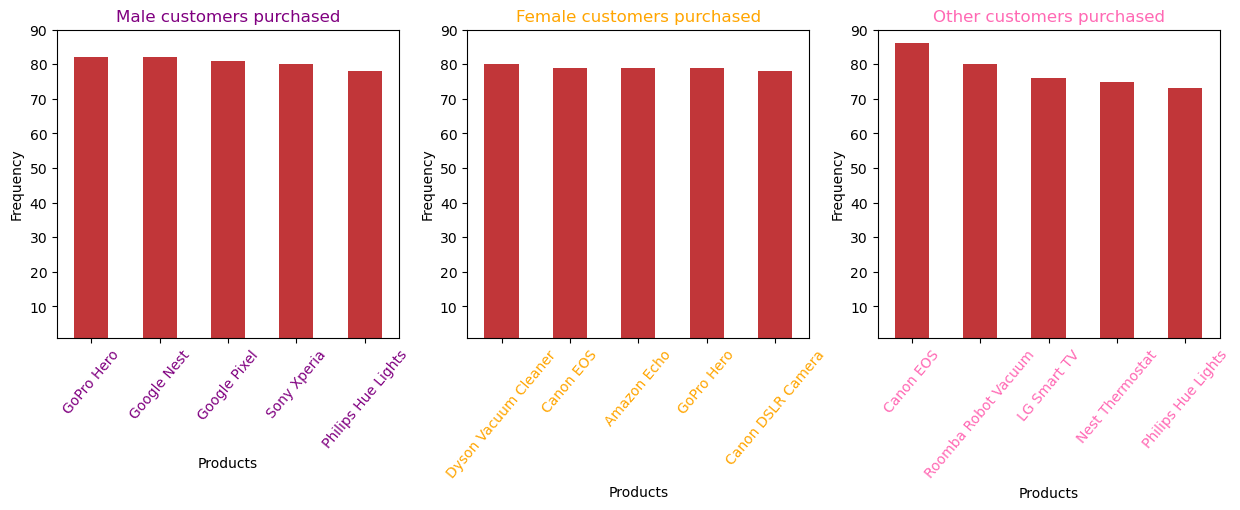

In [47]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
products_male.plot(kind='bar')
plt.title('Male customers purchased',color='purple')
plt.xlabel('Products')
plt.ylabel("Frequency")
plt.ylim(1,90)
plt.xticks(rotation=50,color='purple')


plt.subplot(1,3,2)
products_female.plot(kind='bar')
plt.title('Female customers purchased',color='orange')
plt.xlabel('Products')
plt.ylabel("Frequency")
plt.ylim(1,90)
plt.xticks(rotation=50,color='orange')


plt.subplot(1,3,3)
products_others.plot(kind='bar')
plt.title('Other customers purchased',color='hotpink')
plt.xlabel('Products')
plt.ylabel("Frequency")
plt.ylim(1,90)
plt.xticks(rotation=50,color='hotpink')
plt.show()

In [48]:
df.sample()

,Ticket_ID,Customer Name,Customer_Email,Customer_Age,Customer_Gender,Product_Purchased,Date_of_Purchase,Ticket_Type,Ticket_Subject,Ticket_Description,Ticket_Status,Resolution,Ticket_Priority,Ticket_Channel,First_Response_Time,Time_to_Resolution,Customer_Satisfaction_Rating
5427,5428,John Oconnor,williamschristine@example.com,21,Other,Amazon Kindle,2020-08-09,Refund request,Payment issue,I'm having an issue with the {product_purchase...,Open,NaN,High,Phone,NaN,NaN,NaN


<center><h1 style="color:orange;">Feature Engineering</h1>

In [88]:
df.sample()

,Ticket_ID,Customer Name,Customer_Email,Customer_Age,Customer_Gender,Product_Purchased,Date_of_Purchase,Ticket_Type,Ticket_Subject,Ticket_Description,Ticket_Status,Resolution,Ticket_Priority,Ticket_Channel,First_Response_Time,Time_to_Resolution,Customer_Satisfaction_Rating
3738,3739,Brian Murray,thomas73@example.net,67,Female,LG Smart TV,2020-08-18,Product inquiry,Battery life,The {product_purchased} is unable to establish...,Closed,Often partner indeed per.,Low,Email,2023-06-01 21:32:33,2023-06-01 21:31:33,1.0


In [89]:
df.columns

Index(['Ticket_ID', 'Customer Name', 'Customer_Email', 'Customer_Age',
       'Customer_Gender', 'Product_Purchased', 'Date_of_Purchase',
       'Ticket_Type', 'Ticket_Subject', 'Ticket_Description', 'Ticket_Status',
       'Resolution', 'Ticket_Priority', 'Ticket_Channel',
       'First_Response_Time', 'Time_to_Resolution',
       'Customer_Satisfaction_Rating'],
      dtype='object')

In [ ]:
x=data.drop(['Ticket ID','Customer Satisfaction Rating'],axis=1)
x

In [ ]:
y=data['Customer Satisfaction Rating']
y

<center><h1 style="color:orange;">Model Building</h1>

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1938, 15), (831, 15), (1938,), (831,))

In [77]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
print(x_train.shape)
print(x_test.shape)

(1938, 15)
(831, 15)


In [78]:
model=RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

In [79]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [81]:
y_pred=model.predict(x_test)
y_pred

array([5., 5., 1., 5., 1., 3., 1., 2., 1., 5., 2., 2., 5., 2., 4., 4., 1.,
       3., 2., 4., 2., 3., 2., 3., 3., 1., 1., 4., 1., 5., 2., 5., 4., 2.,
       5., 4., 3., 1., 1., 4., 1., 2., 4., 5., 1., 4., 2., 3., 4., 1., 4.,
       3., 1., 1., 1., 1., 3., 2., 2., 1., 5., 4., 4., 4., 1., 4., 2., 3.,
       5., 5., 2., 4., 2., 2., 5., 2., 2., 3., 3., 4., 1., 3., 2., 3., 3.,
       5., 4., 3., 2., 1., 5., 5., 3., 5., 2., 3., 2., 5., 3., 2., 2., 5.,
       1., 2., 3., 3., 1., 1., 3., 3., 5., 5., 2., 4., 1., 3., 4., 1., 4.,
       1., 3., 4., 2., 2., 5., 5., 2., 4., 3., 4., 2., 5., 3., 5., 3., 4.,
       3., 2., 3., 3., 3., 1., 5., 2., 2., 4., 5., 5., 5., 3., 1., 4., 1.,
       3., 1., 3., 3., 5., 5., 1., 1., 5., 4., 2., 5., 2., 4., 5., 3., 5.,
       3., 4., 3., 5., 3., 1., 4., 5., 4., 3., 5., 2., 1., 1., 1., 4., 2.,
       4., 1., 3., 5., 1., 2., 5., 1., 2., 3., 5., 4., 3., 2., 2., 5., 1.,
       1., 3., 1., 1., 2., 1., 3., 4., 2., 1., 4., 2., 3., 2., 1., 2., 1.,
       4., 5., 5., 3., 5.

In [83]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.21660649819494585

In [85]:
Classification=classification_report(y_test,y_pred)
Classification

'              precision    recall  f1-score   support\n\n         1.0       0.17      0.17      0.17       168\n         2.0       0.24      0.23      0.24       174\n         3.0       0.25      0.29      0.27       175\n         4.0       0.23      0.19      0.21       162\n         5.0       0.18      0.20      0.19       152\n\n    accuracy                           0.22       831\n   macro avg       0.22      0.22      0.21       831\nweighted avg       0.22      0.22      0.22       831\n'

In [86]:
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat

array([[28, 37, 42, 26, 35],
       [39, 40, 39, 26, 30],
       [36, 25, 51, 25, 38],
       [33, 29, 37, 31, 32],
       [33, 33, 32, 24, 30]], dtype=int64)

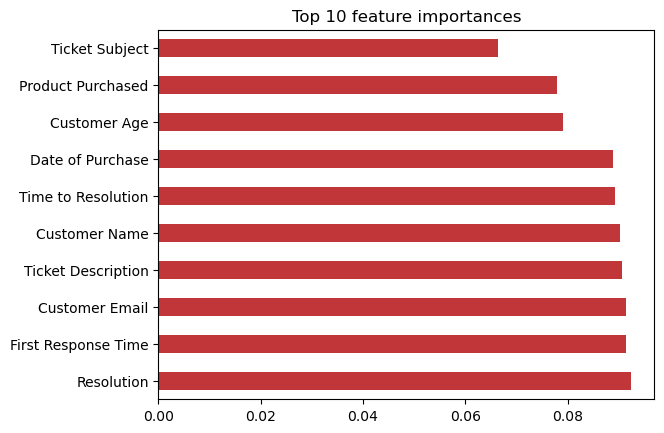

In [87]:
feature_imp=pd.Series(model.feature_importances_,index=x.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 feature importances")
plt.show()